In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm  # Support Vector Machines


In [4]:
# Reading the loan data from a CSV file and creating a DataFrame
df = pd.read_csv("loan.csv")


In [5]:
# Displaying the first few rows of the DataFrame to get a quick overview of the data
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Displaying concise summary information about the DataFrame, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum() #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

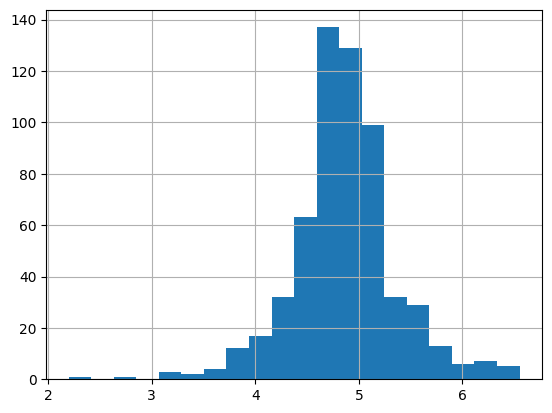

In [8]:
df['loanAmount_log'] = np.log(df['LoanAmount']) #creating a new column as loanAmount_log
df['loanAmount_log'].hist(bins=20)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

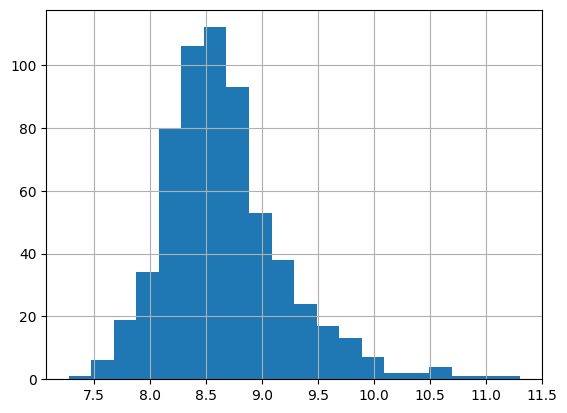

In [10]:
# Creating a new column 'TotalAmount' by summing 'ApplicantIncome' and 'CoapplicantIncome'
df['TotalAmount'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Applying natural logarithm transformation to the 'TotalAmount' column
df['TotalAmount_log'] = np.log(df['TotalAmount'])

# Plotting a histogram of the log-transformed 'TotalAmount' with 20 bins
df['TotalAmount_log'].hist(bins=20)


In [11]:
# Filling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True) #replacing the mode value in the null spaces
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

df.LoanAmount =df.LoanAmount.fillna(df.LoanAmount.mean()) #replacing the mean value in the null spaces
df.loanAmount_log =df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalAmount          0
TotalAmount_log      0
dtype: int64

In [13]:
# Extracting features (independent variables) for model training
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values

# Extracting the target variable (dependent variable) for model training
y = df.iloc[:, 12].values


In [14]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<ipython-input-15-8767138dba1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

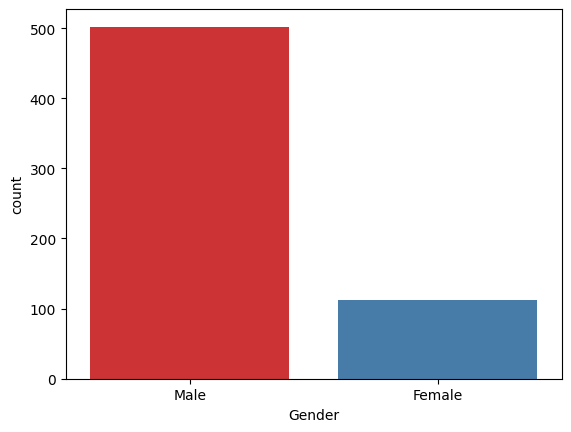

In [15]:
# Displaying the count of loan applicants grouped by gender
print('Number of people who take loan as group by gender')
print(df['Gender'].value_counts())

# Creating a count plot to visualize the distribution of loan applicants based on gender
sns.countplot(x='Gender', data=df, palette='Set1')


In [16]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Importing LabelEncoder from sklearn.preprocessing to encode categorical variables
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()


In [17]:
# Encoding categorical variables in the training set using LabelEncoder
for i in range(0, 5):
    X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i])
X_train[:, 7] = Labelencoder_x.fit_transform(X_train[:, 7])
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [18]:
# Encoding the target variable (y_train) using LabelEncoder
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [19]:
# Encoding the categorical features in the test set (x_test) using LabelEncoder
for i in range(0, 5):
    x_test[:, i] = Labelencoder_x.fit_transform(x_test[:, i])

# Note: It seems there might be an error in the index (7), please verify the correct index.

x_test


array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371

In [20]:
# Encoding the target variable (y_test) using LabelEncoder
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

y_test


array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [21]:
# Standardizing the features using StandardScaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
x_test = ss.transform(x_test)


In [22]:
# Creating and training a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
# Making predictions with the trained RandomForestClassifier and evaluating accuracy
from sklearn import metrics

y_pred = rf_clf.predict(x_test)

# Calculating and printing the accuracy of the random forest classifier
print("Accuracy of the RandomForestClassifier:", metrics.accuracy_score(y_pred, y_test))

# Displaying the predicted labels
y_pred


Accuracy of the RandomForestClassifier: 0.8373983739837398


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [24]:
# Training a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Training the classifier using the preprocessed training data
nb.fit(X_train, y_train)


GaussianNB()

In [25]:
# Making predictions using the trained Naive Bayes classifier
y_pred = nb.predict(x_test)

# Calculating and printing the accuracy of the Naive Bayes classifier
print("Accuracy of Naive Bayes classifier is ", metrics.accuracy_score(y_pred, y_test))

# Displaying the predicted labels
y_pred


Accuracy of Naive Bayes classifier is  0.2682926829268293


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# Training a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Making predictions using the trained Decision Tree classifier
y_pred = dt.predict(x_test)

# Calculating and printing the accuracy of the Decision Tree classifier
print("Accuracy of Decision Tree classifier is ", metrics.accuracy_score(y_pred, y_test))

# Displaying the predicted labels
y_pred


Accuracy of Decision Tree classifier is  0.6341463414634146


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [29]:
# Training a k-NN (K Nearest Neighbors) classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Making predictions using the trained k-NN classifier
y_pred = knn.predict(x_test)

# Calculating and printing the accuracy of the k-NN classifier on the test set
print("Accuracy of k-NN classifier is", metrics.accuracy_score(y_test, y_pred))


Accuracy of k-NN classifier is 0.7560975609756098
